In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load data
df = pd.read_csv("C:/Users/Rodrigo/Documents/PROGRAMACION/PERSONAL PROJECTS/Econometrics Analysis/Multi_Asset_Econometric_Analysis/data/Data.csv")

In [3]:
#Functions
def clean_na(data): #This function will drop all Nas keeping just the dates where all assets have information.
    data["Date"] = pd.to_datetime(data["Date"]).dt.tz_localize(None)
    data = data.set_index("Date")
    data = data.sort_index()
    # data = data.resample("W-FRI").last()
    Num_Na = data.isna().sum()
    # print(Num_Na)
    data = data.dropna()
    return data

def log_returns(data):
    lret = np.log(data).diff()
    return lret

def statistics(data):
    mean = np.mean(data, axis = 0) #MEAN
    variance = np.var(data, axis = 0) #VARIANCE
    skewness = data.skew(axis = 0) #SKEWNESS
    kurtosis = data.kurtosis(axis = 0) #KURTOSIS
    statistical_info = pd.DataFrame({"Mean": mean, "Variance" : variance, "Skewness": skewness, "Kurtosis" : kurtosis}) #CREATES A COMPLETE DF WITH ALL RESULTS
    return statistical_info


    

In [4]:
#Clean the data
df = clean_na(df)
df = df[df["Oil"] > 0] #There were observations where oil was negative due to storage
#Take differences and returns
df["LogRetSP500"] = log_returns(df["^GSPC"])
df["LogRetOil"] = log_returns(df["Oil"])
df["LogRetJPY"] = log_returns(df["USDJPY"])
df["CorSpDif"] = df["Corp_Spread"].diff()
df["GovDif"] = df["DGS10"].diff()

In [5]:
stats = statistics(df)
print(stats)

                    Mean      Variance  Skewness   Kurtosis
^GSPC        2210.227668  1.878600e+06  1.254153   0.578377
DGS10           3.311517  1.688467e+00  0.071055  -0.736761
Corp_Spread     1.548553  7.042840e-01  3.288643  13.641978
Oil            63.893956  6.317181e+02  0.216837  -0.661436
USDJPY        111.821295  3.093868e+02  0.361999   0.327415
LogRetSP500     0.000240  1.516330e-04 -0.394050  10.511471
LogRetOil       0.000145  8.309426e-04 -1.995706  81.979450
LogRetJPY       0.000056  3.939263e-05 -0.377071   4.245658
CorSpDif       -0.000056  7.004048e-04  3.669441  74.544253
GovDif         -0.000355  3.424482e-03 -0.012548   2.353979


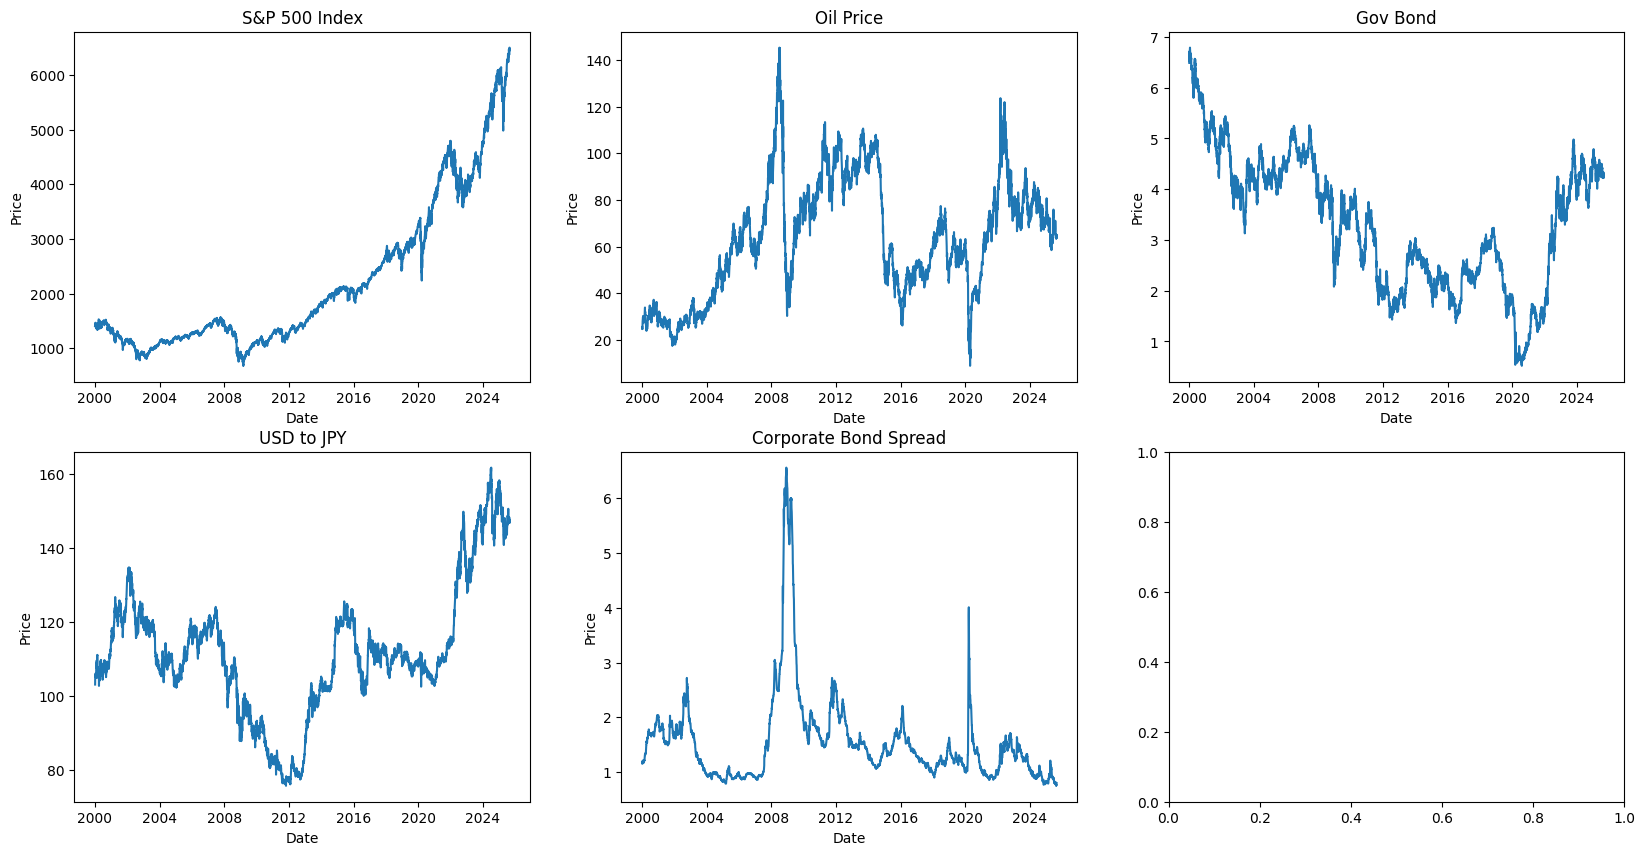

In [6]:
#PLOT PRICES
fig, ax = plt.subplots(2,3, figsize = (20,10))
#PLOT S&P 500
ax[0][0].set_title("S&P 500 Index")
ax[0][0].set_xlabel("Date")
ax[0][0].set_ylabel("Price")
ax[0][0].plot(df["^GSPC"])

#PLOT OIL
ax[0][1].set_title("Oil Price")
ax[0][1].set_xlabel("Date")
ax[0][1].set_ylabel("Price")
ax[0][1].plot(df["Oil"])

#PLOT GOV BOND
ax[0][2].set_title("Gov Bond")
ax[0][2].set_xlabel("Date")
ax[0][2].set_ylabel("Price")
ax[0][2].plot(df["DGS10"])

#PLOT USD JPY
ax[1][0].set_title("USD to JPY")
ax[1][0].set_xlabel("Date")
ax[1][0].set_ylabel("Price")
ax[1][0].plot(df["USDJPY"])

#PLOT CORPORATE BOND
ax[1][1].set_title("Corporate Bond Spread")
ax[1][1].set_xlabel("Date")
ax[1][1].set_ylabel("Price")
ax[1][1].plot(df["Corp_Spread"])


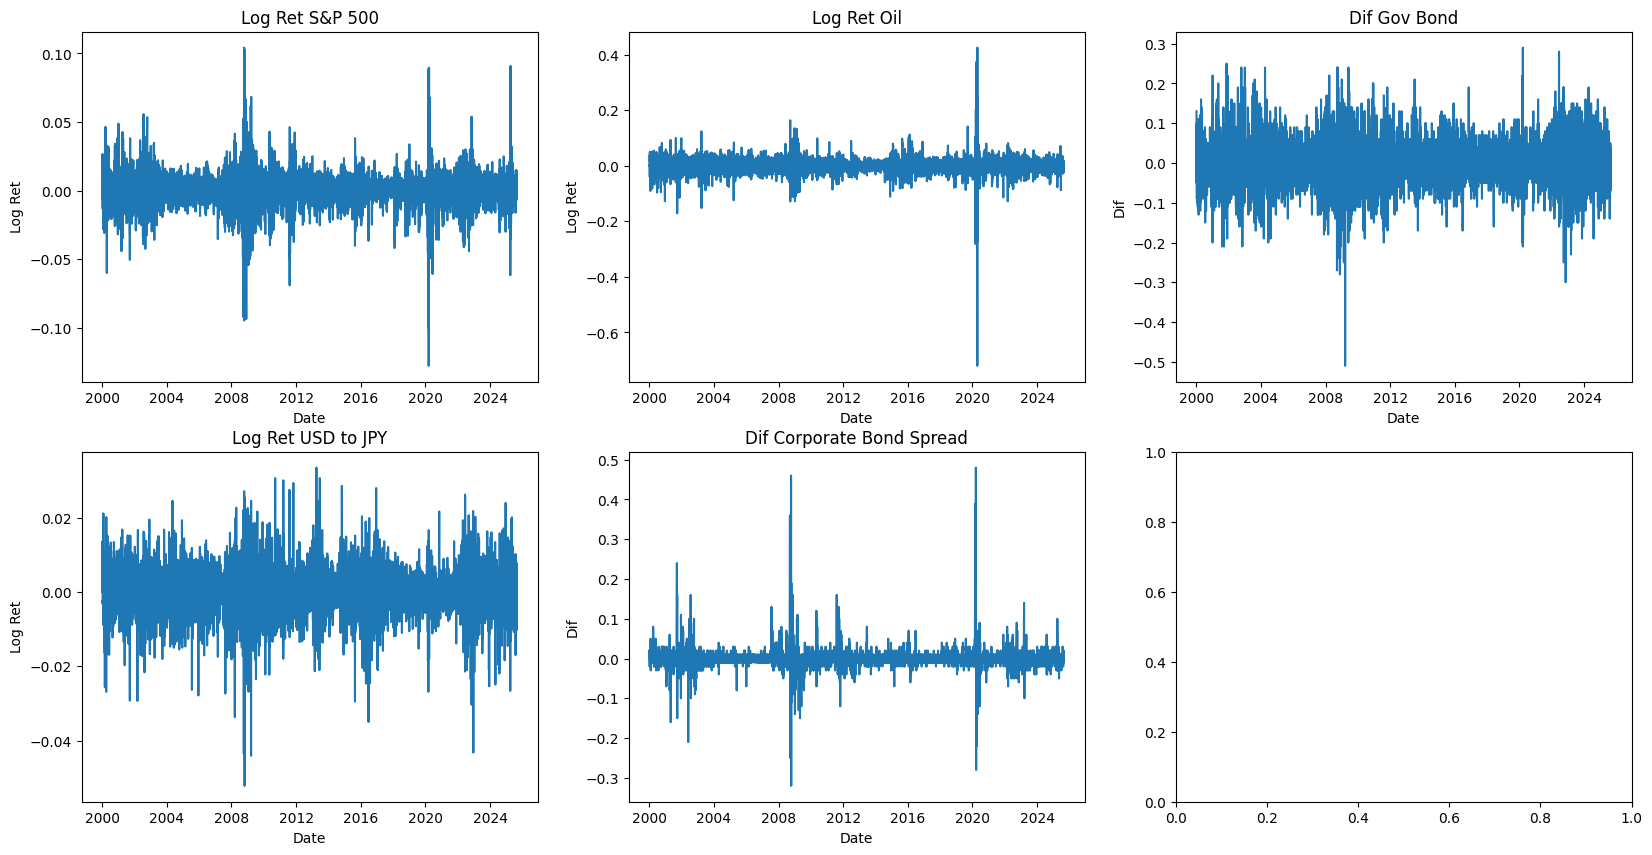

In [7]:
#PLOT LOG RETURNS AND DIFFERENCES
fig, ax = plt.subplots(2,3, figsize = (20,10))
#PLOT Log Ret S&P 500
ax[0][0].set_title("Log Ret S&P 500")
ax[0][0].set_xlabel("Date")
ax[0][0].set_ylabel("Log Ret")
ax[0][0].plot(df["LogRetSP500"])

#PLOT Log Ret Oil
ax[0][1].set_title("Log Ret Oil")
ax[0][1].set_xlabel("Date")
ax[0][1].set_ylabel("Log Ret")
ax[0][1].plot(df["LogRetOil"])

#PLOT Dif Gov Bond
ax[0][2].set_title("Dif Gov Bond")
ax[0][2].set_xlabel("Date")
ax[0][2].set_ylabel("Dif")
ax[0][2].plot(df["GovDif"])

#PLOT Log Ret USD to JPY
ax[1][0].set_title("Log Ret USD to JPY")
ax[1][0].set_xlabel("Date")
ax[1][0].set_ylabel("Log Ret")
ax[1][0].plot(df["LogRetJPY"])

#PLOT Dif Corporate Bond Spread
ax[1][1].set_title("Dif Corporate Bond Spread")
ax[1][1].set_xlabel("Date")
ax[1][1].set_ylabel("Dif")
ax[1][1].plot(df["CorSpDif"])


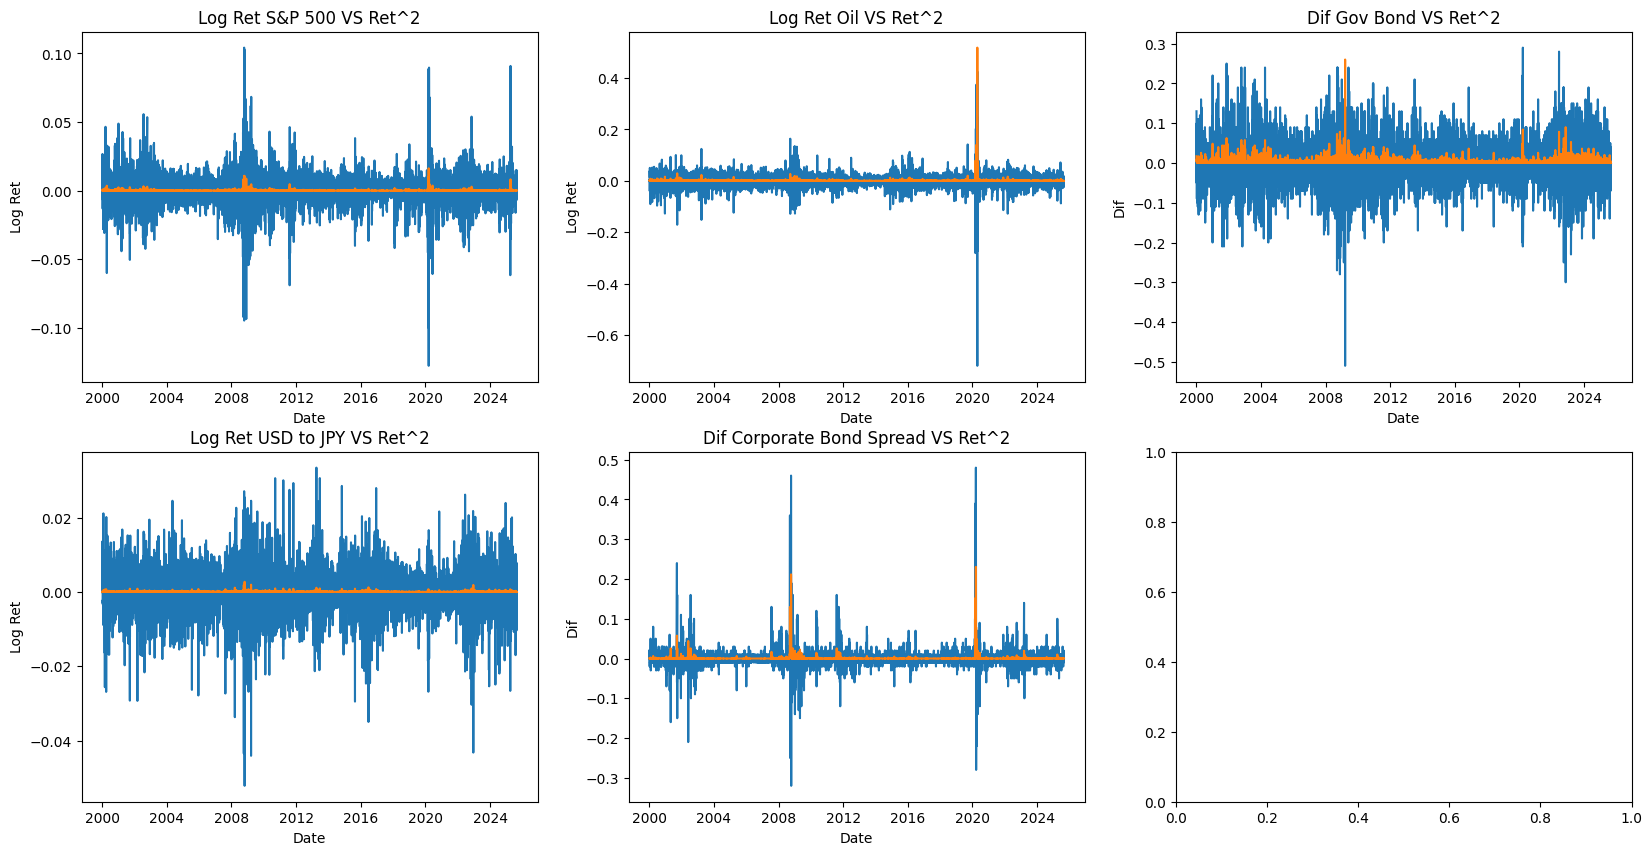

In [10]:
#PLOT LOG RETURNS AND DIFFERENCES AND SQUARED RETURNS
fig, ax = plt.subplots(2,3, figsize = (20,10))
#PLOT Log Ret S&P 500
ax[0][0].set_title("Log Ret S&P 500 VS Ret^2")
ax[0][0].set_xlabel("Date")
ax[0][0].set_ylabel("Log Ret")
ax[0][0].plot(df["LogRetSP500"])
ax[0][0].plot(df["LogRetSP500"] ** 2)

#PLOT Log Ret Oil
ax[0][1].set_title("Log Ret Oil VS Ret^2")
ax[0][1].set_xlabel("Date")
ax[0][1].set_ylabel("Log Ret")
ax[0][1].plot(df["LogRetOil"])
ax[0][1].plot(df["LogRetOil"] ** 2)

#PLOT Dif Gov Bond
ax[0][2].set_title("Dif Gov Bond VS Ret^2")
ax[0][2].set_xlabel("Date")
ax[0][2].set_ylabel("Dif")
ax[0][2].plot(df["GovDif"])
ax[0][2].plot(df["GovDif"]**2)

#PLOT Log Ret USD to JPY
ax[1][0].set_title("Log Ret USD to JPY VS Ret^2")
ax[1][0].set_xlabel("Date")
ax[1][0].set_ylabel("Log Ret")
ax[1][0].plot(df["LogRetJPY"])
ax[1][0].plot(df["LogRetJPY"] ** 2)

#PLOT Dif Corporate Bond Spread
ax[1][1].set_title("Dif Corporate Bond Spread VS Ret^2")
ax[1][1].set_xlabel("Date")
ax[1][1].set_ylabel("Dif")
ax[1][1].plot(df["CorSpDif"])
ax[1][1].plot(df["CorSpDif"]** 2)

<Axes: >

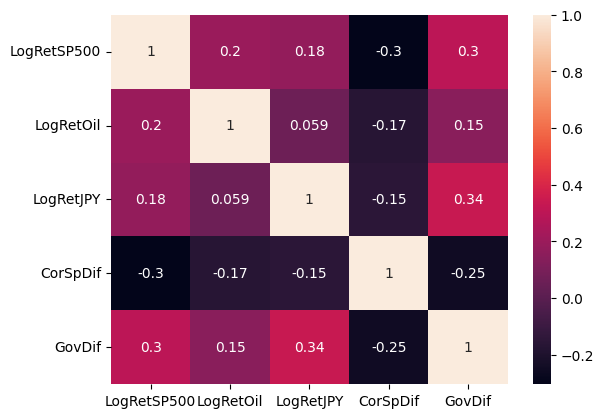

In [8]:
cols = df.columns
cols = cols[5:]
corr = df[cols].corr()
sns.heatmap(corr, annot = True)